# Medical Dataset və Logistic Regression Task

Bu notebook-da **logistic regression** tapşırığı üçün  bir tibbi dataset təqdim olunur. Dataset-in əsas özəllikləri bunlardır:

1. **Age (Yaş)**: Pasiyentin yaşı. Float tipində saxlanılır (25–80 aralığında, bəzi dəyərlər itkin ola bilər).
2. **Gender (Cins)**: 0 və ya 1 (bəzi dəyərlər itkin ola bilər).
3. **BMI**: Bədən kütlə indeksi (float). 18.0–40.0 normal aralığı, amma aykırı dəyərlər (60–75) də daxil edilib.
4. **BloodPressure (Qan təzyiqi)**: 90–180 normal aralığı, bəzi aykırı dəyərlər (300–320).
5. **Cholesterol (Xolesterin)**: 150–280 normal aralığı, bəzi dəyərlər itkin ola bilər.
6. **Disease (Hədəf dəyişəni)**: 0/1 kimi xəstəlik diaqnozu.



# TASK: Logistic Regression 

Bu dataset-də aşağıdakı tapşırıqları yerinə yetirməyiniz tələb olunur:

1. **Məlumatların İlkin Analizi (EDA)**  
   - Missing data (NaN) dəyərlərini tapın. Hər sütunda nə qədər NaN var? Onları necə emal etməyi planlaşdırırsınız (sətirləri silmək, doldurmaq, başqa üsul)?  
   - Aykırı (outlier) dəyərləri müəyyənləşdirin. Hansı sütunlarda aykırı vəziyyətlər var və bunun təsirini necə aradan qaldırmaq olar (winsorizing, trimming və s.)?

2. **Məlumatların Təkrar Hazırlanması**  
   - Məlumatları miqyaslaşdırmaq (scaling) vacibdirmi? Hansı üsulu tətbiq edərdiniz (StandardScaler, MinMaxScaler və s.)?  
   - Categorical dəyişənlər (Gender) üçün one-hot/dummy kodlaşdırma lazımdırmı? (Bu durumda ola bilər ki, 0/1 olduğu üçün birbaşa işlədə bilərsiniz)

3. **Logistic Regression Modelinin Qurulması**  
   - Sadə (baseline) Logistic Regression modeli quraşdırın.  
   - L1 (Lasso) və L2 (Ridge) regularization modelləri ilə sınaqlar aparın.  
   - Hyperparameter tuning (GridSearchCV və ya RandomizedSearchCV) tətbiq edərək ən yaxşı parametrləri seçin (məsələn, C və ya penalty).

4. **Model Performansının Qiymətləndirilməsi**  
   - Accuracy, Precision, Recall, F1-score, ROC AUC kimi metriklərdən istifadə edin.  
   - Tarazsız (imbalanced) paylanma ehtimalını yoxlayın (Disease=1 və Disease=0 payları). Əgər əhəmiyyətli fərq varsa, SMOTE, Oversampling, Undersampling və s. metodları sınaqdan keçirin.  
   - Qərar həddi (decision threshold) ilə oynayaraq modellə necə fərqli nəticələr əldə etmək olar?

5. **Modelin İzahediciliyi (Interpretability)**  
   - Logistic Regression koeffisientlərini şərh edin. Hansı dəyişənlər xəstəliyə daha çox təsir edir? (Bu, sintetik dataset olsa da, məntiqinizi göstərməyiniz vacibdir.)  
   - Hər hansı gözlənilməz nəticə varmı (məsələn, koeffisientin “əks” təsiri)? Belə hal yaranırsa, səbəbini araşdırın.

6. **Nəticələrin Təqdimatı**  
   - Nəticələri qrafiklərlə (məsələn, ROC Curve, Precision-Recall Curve) və cədvəllərlə təqdim edin.  
   - Gələcəkdə daha yaxşı model qurmaq üçün əlavə nələr edilə bilər (məsələn, feature engineering, domain bilikləri tətbiqi və s.)?

---
**Uğurlar!**


In [378]:
# Lazım olacaq kitabxanalar
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

# Vizualizasiya üçün əlavə kitabxanalar:
import matplotlib.pyplot as plt
import seaborn as sns

# Model qurmaq üçün
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report
)


from sklearn.metrics import roc_curve, roc_auc_score

# Balanslaşdırma üçün (əgər lazım olsa)
# !pip install imbalanced-learn  # əgər envde qurulmayıbsa
# from imblearn.over_sampling import SMOTE

# Dataseti oxuyuruq
df1 = pd.read_csv("medical_data1.csv")
df1.head()


,Unnamed: 0,Age,Gender,BMI,BloodPressure,Cholesterol,Disease
0,0,63.0,0.0,39.295423,128.0000,198.0,0
1,1,76.0,0.0,19.944981,135.0000,269.0,0
2,2,53.0,1.0,35.419992,118.0000,193.0,0
3,3,39.0,1.0,29.929161,151.0000,205.0,1
4,4,67.0,1.0,28.561011,135.5074,260.0,1


In [379]:
#Məlumatların İlkin Analizi (EDA)

In [380]:
df1.shape

(500, 7)

In [381]:
df1.isna().sum()

Unnamed: 0       0
Age              0
Gender           0
BMI              0
BloodPressure    0
Cholesterol      0
Disease          0
dtype: int64

In [382]:
df1['Disease'].value_counts()

Disease
0    344
1    156
Name: count, dtype: int64

In [383]:
X = df1.drop(columns=['Disease']) 
y = df1['Disease'] 

smote = SMOTE(random_state=42)
X_s, y_s = smote.fit_resample(X, y)

In [384]:
df = pd.DataFrame(pd.concat([X_s, y_s], axis=1))

In [385]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     688 non-null    int64  
 1   Age            688 non-null    float64
 2   Gender         688 non-null    float64
 3   BMI            688 non-null    float64
 4   BloodPressure  688 non-null    float64
 5   Cholesterol    688 non-null    float64
 6   Disease        688 non-null    int64  
dtypes: float64(5), int64(2)
memory usage: 37.8 KB


In [386]:
df.describe()

,Unnamed: 0,Age,Gender,BMI,BloodPressure,Cholesterol,Disease
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000
mean,249.043605,52.791096,0.439797,30.735960,139.154018,221.171653,0.500000
std,146.442316,14.920316,0.471824,6.907875,27.885991,36.458209,0.500364
min,0.000000,25.000000,0.000000,18.005226,90.000000,150.000000,0.000000
25%,123.750000,42.000000,0.000000,26.898108,121.178531,194.750000,0.000000
50%,251.500000,52.646055,0.039951,30.300292,137.502014,221.783685,0.500000
75%,370.250000,64.638065,1.000000,34.667227,156.822202,252.971293,1.000000
max,499.000000,79.000000,1.000000,74.715673,317.000000,280.000000,1.000000


In [387]:
df.isna().sum()

Unnamed: 0       0
Age              0
Gender           0
BMI              0
BloodPressure    0
Cholesterol      0
Disease          0
dtype: int64

In [388]:
df['Disease'].value_counts()

Disease
0    344
1    344
Name: count, dtype: int64

In [389]:
df.drop(columns=['Unnamed: 0'], inplace= True)

In [390]:
def handling_null_values():
    for col in df.columns:
            na_ratio = df[col].isna().mean()
            if na_ratio > 0.4:  
                df.drop(columns=[col], inplace=True)
            elif df[col].dtype == 'object' or df[col].nunique()==2:  
                df[col].fillna(df[col].mode()[0], inplace=True)
            else:  
                df[col].fillna(df[col].mean(), inplace=True)

    return df

handling_null_values()

df.isna().sum()

C:\Users\thete\AppData\Local\Temp\ipykernel_12068\2530823602.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
C:\Users\thete\AppData\Local\Temp\ipykernel_12068\2530823602.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

Age              0
Gender           0
BMI              0
BloodPressure    0
Cholesterol      0
Disease          0
dtype: int64

In [391]:
def remove_duplicates(df):
            
        df.drop_duplicates(inplace=True)

remove_duplicates(df)

In [392]:
def handling_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    z_scores = df[numeric_cols].apply(zscore)
    df = df[(np.abs(z_scores) < 3).all(axis=1)]

    return df


handling_outliers(df)

df.head()

,Age,Gender,BMI,BloodPressure,Cholesterol,Disease
0,63.0,0.0,39.295423,128.0000,198.0,0
1,76.0,0.0,19.944981,135.0000,269.0,0
2,53.0,1.0,35.419992,118.0000,193.0,0
3,39.0,1.0,29.929161,151.0000,205.0,1
4,67.0,1.0,28.561011,135.5074,260.0,1


In [393]:
#2.Məlumatların  təkrar hazırlanması

In [394]:
X = df.drop(columns=['Disease']) 
y = df['Disease']  

In [395]:
def split_data(X, y, test_size=0.2, random_state=42):
            
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

        return X_train, X_test, y_train, y_test



In [396]:

def scaling(X_train, X_test):

    cols_to_scale=['Age','BMI','BloodPressure','Cholesterol']
    scaler = MinMaxScaler()           

    for column in cols_to_scale:  
        X_train[column] = scaler.fit_transform(X_train[[column]])
        X_test[column] = scaler.transform(X_test[[column]])

    return X_train, X_test

In [397]:
# 3. Logistic Regression Modelinin Qurulması

In [398]:
df['Disease'].value_counts()

Disease
0    344
1    344
Name: count, dtype: int64

In [399]:
X_train, X_test, y_train, y_test = split_data(X, y)
X_train, X_test = scaling(X_train, X_test)


In [400]:
model = LogisticRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

In [401]:
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.72      0.81      0.76        63
           1       0.82      0.73      0.77        75

    accuracy                           0.77       138
   macro avg       0.77      0.77      0.77       138
weighted avg       0.77      0.77      0.77       138



In [402]:
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', C=0.5)
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)

ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train,y_train)

y_pred2= ridge_model.predict(X_test)
y_pred3= lasso_model.predict(X_test)

In [403]:
report_ridge = classification_report(y_test, y_pred2)
report_lasso = classification_report(y_test, y_pred3)

In [404]:
print(report_ridge)

              precision    recall  f1-score   support

           0       0.73      0.81      0.77        63
           1       0.82      0.75      0.78        75

    accuracy                           0.78       138
   macro avg       0.78      0.78      0.78       138
weighted avg       0.78      0.78      0.78       138



In [405]:
print(report_lasso)

              precision    recall  f1-score   support

           0       0.71      0.79      0.75        63
           1       0.81      0.73      0.77        75

    accuracy                           0.76       138
   macro avg       0.76      0.76      0.76       138
weighted avg       0.77      0.76      0.76       138



In [406]:
param_grid = {
    'C': [0.1, 1, 10, 100],  
    'solver': ['liblinear', 'lbfgs'],  
    'max_iter': [100, 200, 300] 
}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)


grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100], 'max_iter': [100, 200, 300],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy', verbose=1)

In [407]:
best_est = grid_search.best_estimator_

y_pred4 = best_est.predict(X_test)

In [408]:
report_gs = classification_report(y_test, y_pred4)

print(report_gs)

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        63
           1       0.82      0.72      0.77        75

    accuracy                           0.76       138
   macro avg       0.76      0.76      0.76       138
weighted avg       0.77      0.76      0.76       138



In [409]:
# 4. Model Performansının Qiymətləndirilməsi

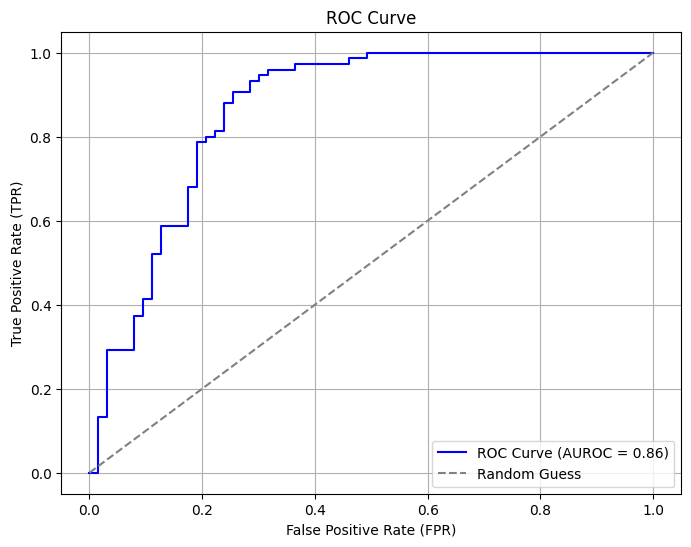

In [410]:

y_prob = model.predict_proba(X_test)[:, 1] 

fpr, tpr, thresholds = roc_curve(y_test, y_prob)


auroc_score = roc_auc_score(y_test, y_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUROC = {auroc_score:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess') 
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [411]:
youden_j = tpr - fpr
optimal_idx = youden_j.argmax() 
optimal_threshold = thresholds[optimal_idx]

optimal_threshold

np.float64(0.4142761830167271)

In [412]:

y_prob = model.predict_proba(X_test)[:, 1]

optimal_threshold = 0.42
y_pred_new = (y_prob >= optimal_threshold).astype(int)


print(classification_report(y_test, y_pred_new))


              precision    recall  f1-score   support

           0       0.84      0.75      0.79        63
           1       0.80      0.88      0.84        75

    accuracy                           0.82       138
   macro avg       0.82      0.81      0.82       138
weighted avg       0.82      0.82      0.82       138



In [413]:
# 5 Koeffisientlerin tehlili


correlation_matrix = df.corr()


print(correlation_matrix)


                    Age    Gender       BMI  BloodPressure  Cholesterol  \
Age            1.000000 -0.011374 -0.056101      -0.019003     0.065343   
Gender        -0.011374  1.000000 -0.010842       0.022528     0.013598   
BMI           -0.056101 -0.010842  1.000000       0.033509     0.011190   
BloodPressure -0.019003  0.022528  0.033509       1.000000     0.084970   
Cholesterol    0.065343  0.013598  0.011190       0.084970     1.000000   
Disease        0.009263 -0.035205  0.332916       0.351968     0.465620   

                Disease  
Age            0.009263  
Gender        -0.035205  
BMI            0.332916  
BloodPressure  0.351968  
Cholesterol    0.465620  
Disease        1.000000  


In [414]:
coefficients = model.coef_[0]  
features = X.columns

coef_arr = np.array([coefficients,features]).T

coef_df = pd.DataFrame(coef_arr)

coef_df

,0,1
0,-0.053667,Age
1,-0.128455,Gender
2,4.508111,BMI
3,4.647839,BloodPressure
4,3.558516,Cholesterol
